# Análisis exploratorio de los datos

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [68]:
df = pd.read_csv('cinemagix-movies.csv')

In [69]:
df.head()

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MovieName      10000 non-null  object 
 1   YearOfRelease  10000 non-null  int64  
 2   RunTime        10000 non-null  int64  
 3   MovieRating    10000 non-null  float64
 4   Votes          10000 non-null  int64  
 5   MetaScore      7974 non-null   float64
 6   Gross          7085 non-null   float64
 7   Genre          10000 non-null  object 
 8   Certification  9631 non-null   object 
 9   Director       10000 non-null  object 
 10  Stars          10000 non-null  object 
 11  Description    10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


In [6]:
missing_values = df.isnull().sum()

descriptive_stats = df.describe()

In [7]:
missing_values, descriptive_stats

(MovieName           0
 YearOfRelease       0
 RunTime             0
 MovieRating         0
 Votes               0
 MetaScore        2026
 Gross            2915
 Genre               0
 Certification     369
 Director            0
 Stars               0
 Description         0
 dtype: int64,
        YearOfRelease       RunTime   MovieRating         Votes    MetaScore  \
 count   10000.000000  10000.000000  10000.000000  1.000000e+04  7974.000000   
 mean     2001.413600    110.725000      6.727020  9.279738e+04    59.171432   
 std        18.597804     22.053073      0.821264  1.716509e+05    17.268795   
 min      1915.000000     45.000000      4.900000  1.000200e+04     7.000000   
 25%      1994.000000     96.000000      6.100000  1.685175e+04    47.000000   
 50%      2007.000000    107.000000      6.700000  3.417950e+04    60.000000   
 75%      2015.000000    121.000000      7.300000  9.154600e+04    72.000000   
 max      2023.000000    439.000000      9.300000  2.804443e+06   100

In [8]:
duplicated_rows = df.duplicated().sum()
print(duplicated_rows)

0


- Podemos observar que hay una cantidad considerable de valores nulos en las variables MetaScore, Gross y Certification.
- Nuestra variable objetivo "Gross" tiene casi un 30% de los datos perdidos, por lo tanto es necesario un trabajo de imputación antes de seguir trabajando el modelo.
- La desviación estándar de la variable "Gross" es alarmantemente alta, lo que significa que el éxito financiero de un film es difícil de predecir, necesitamos más contexto de la distribución de los datos mediante gráficos para visualizar cómo se distribuyen.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
missing_values = df.isnull().sum()
fig_missing = px.bar(
    x=missing_values.index, 
    y=missing_values.values, 
    labels={'y':'Cantidad de Valores Faltantes', 'x':'Variable'},
    title='Valores Faltantes por Variable'
)
fig_missing.show()

In [11]:
data_types = df.dtypes.value_counts()
fig_dtypes = px.bar(
    x=data_types.index.astype(str), 
    y=data_types.values, color = data_types.values,
    labels={'y':'Cantidad de Variables', 'x':'Tipo de Dato'},
    title='Cantidad de Variables por Tipo de Dato'
)
fig_dtypes.show()

In [12]:
# Creamos unDataFrame para almacenar el nombre de la variable, 
# su tipo de dato y la cantidad de valores únicos
vars_tipo_unicos = pd.DataFrame(columns=['Variable', 'Tipo_de_Dato', 'Nro_Vals_Unicos', 'Valores_Unicos'])

# Poblamos el DataFrame con los distintos tipos de datos 
# de las columnas (variables)
data_a_concat = []
for col in df.columns:
    data_a_concat.append(pd.DataFrame({
        'Variable': [col],
        'Tipo_de_Dato': [str(df[col].dtype)],
        'Nro_Vals_Unicos': [df[col].nunique()],
        'Valores_Únicos': [list(df[col].unique())]  # Asegurándonos de que es una lista
    }))

vars_tipo_unicos = pd.concat(data_a_concat, ignore_index=True)

In [13]:
# Gráficamos número de valores de cada variable y segun tipo de dato
for dtype in vars_tipo_unicos['Tipo_de_Dato'].unique():
    fig = px.bar(
        vars_tipo_unicos[vars_tipo_unicos['Tipo_de_Dato'] == dtype],
        x='Variable',
        y='Nro_Vals_Unicos',
        title=f'Número de Valores Únicos para variables de tipo {dtype}',
        labels={'Valores_Unicos':'Número de Valores Únicos', 'Variable':'Variable'}
    )
    fig.show()

Las variables de tipo Object son todas nominales.

In [14]:


vars_object_nominales = vars_tipo_unicos[(vars_tipo_unicos['Tipo_de_Dato'] == 'object') & (vars_tipo_unicos['Nro_Vals_Unicos'] > 2)]['Variable'].tolist()
print(f"Columnas (variables) de tipo OBJECT NOMINALES = {vars_object_nominales}");

Columnas (variables) de tipo OBJECT NOMINALES = ['MovieName', 'Genre', 'Certification', 'Director', 'Stars', 'Description']


In [15]:
vars_object_nominales.remove("Description")

In [16]:
# Sacamos y analizamos las variables de tipo int64
vars_int64_enteras = vars_tipo_unicos[(vars_tipo_unicos['Tipo_de_Dato'] == 'int64')]
vars_int64_enteras

,Variable,Tipo_de_Dato,Nro_Vals_Unicos,Valores_Únicos
1,YearOfRelease,int64,107,"[1994, 1972, 1993, 1975, 2008, 2003, 1957, 197..."
2,RunTime,int64,171,"[142, 175, 135, 87, 152, 195, 201, 96, 202, 14..."
4,Votes,int64,9304,"[2804443, 1954174, 12995, 42231, 2786129, 1409..."


RunTime y Votes pueden ser analizadas como RATIO

In [17]:
vars_numericas_discretas = ['RunTime', 'Votes']

In [18]:
vars_numericas_float = vars_tipo_unicos[(vars_tipo_unicos['Tipo_de_Dato'] == 'float64')]['Variable'].tolist()
vars_numericas_float

['MovieRating', 'MetaScore', 'Gross']

In [19]:
print(f"Columnas (variables) de tipo OBJECT NOMINALES = {vars_object_nominales}");
print(f"Columnas (variables) de tipo NUMERICAS DISCRETAS (RATIO) = {vars_numericas_discretas}");
print(f"Columnas (variables) de tipo NUMERICAS FLOAT (RATIO) = {vars_numericas_float}");

Columnas (variables) de tipo OBJECT NOMINALES = ['MovieName', 'Genre', 'Certification', 'Director', 'Stars']
Columnas (variables) de tipo NUMERICAS DISCRETAS (RATIO) = ['RunTime', 'Votes']
Columnas (variables) de tipo NUMERICAS FLOAT (RATIO) = ['MovieRating', 'MetaScore', 'Gross']


In [20]:
df.describe()

,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross
count,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03
mean,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07
std,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07
min,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06
50%,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07
75%,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07
max,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [70]:
df['Gross'] = round(df['Gross'].copy()/10**6, ndigits=6)
df['Gross'].describe()

count    7085.000000
mean       40.175004
std        67.486581
min         0.000000
25%         2.340000
50%        16.930000
75%        48.640000
max       936.660000
Name: Gross, dtype: float64

In [71]:
df['Votes'] = round(df['Votes'].copy()/10**3, ndigits=6)
df['Votes'].describe()

count    10000.000000
mean        92.797375
std        171.650900
min         10.002000
25%         16.851750
50%         34.179500
75%         91.546000
max       2804.443000
Name: Votes, dtype: float64

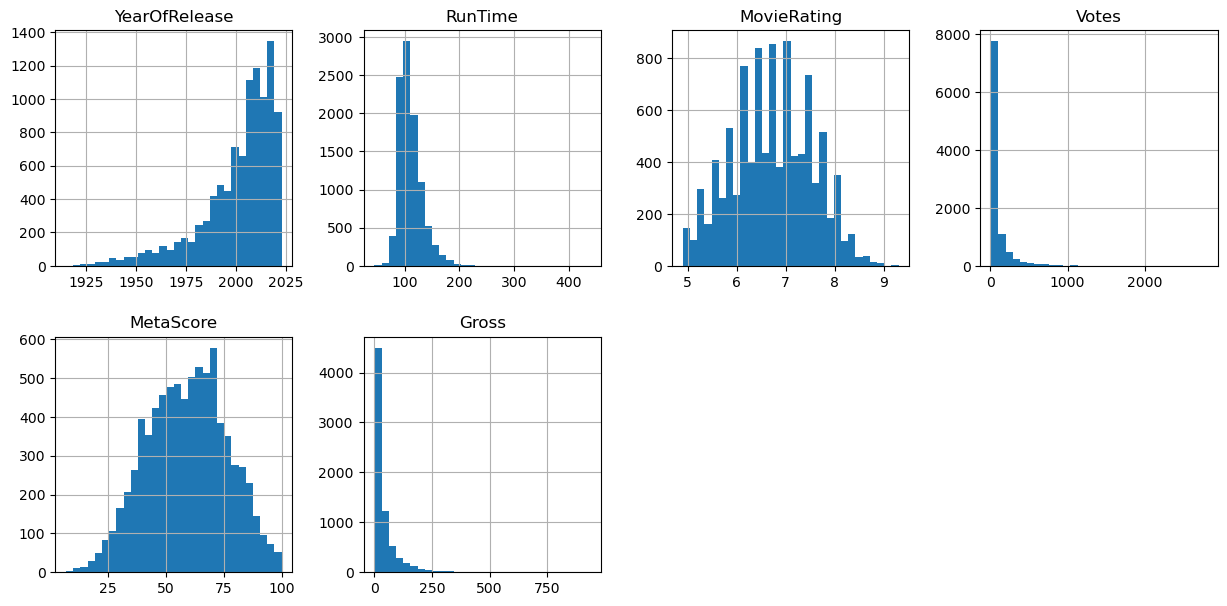

In [72]:
df.hist(bins=30, figsize=(15, 15), layout=(4, 4))
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_12464\3601176126.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



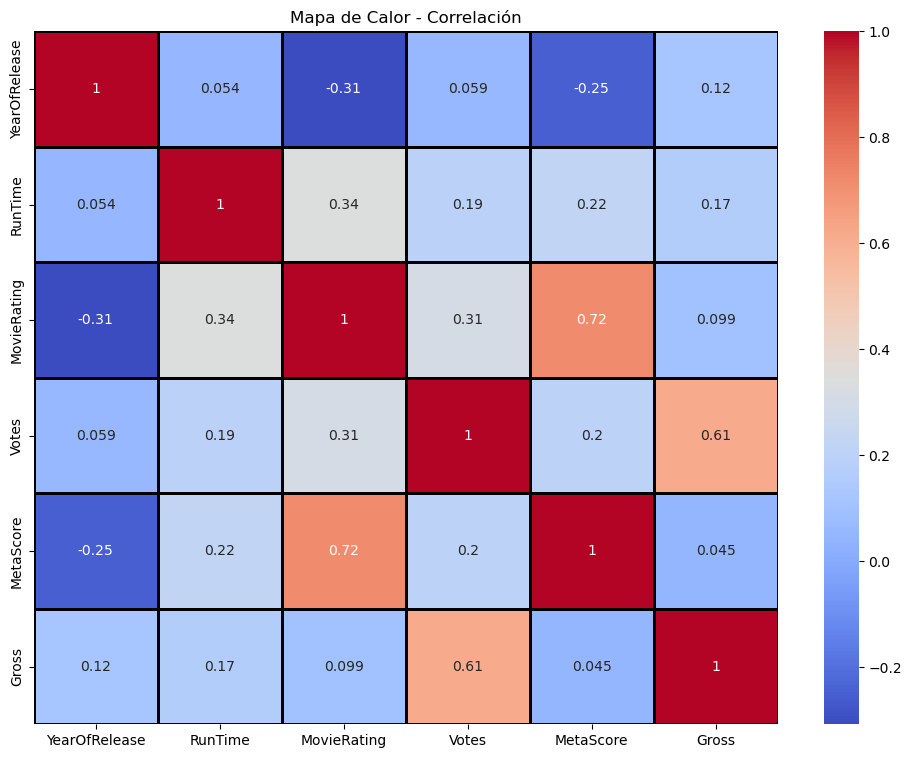

In [73]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title("Mapa de Calor - Correlación")
plt.show()

A partir de esta matriz de correlación podemos decir que para nuestra variable objetivo "Gross":
- YearOfRelease tiene una débil pero considerable relación con la variable objetivo.
- RunTime también tiene una correlación débil pero considerable al fin y al cabo.
- Votes es la característica que más correlación tiene con la variable objetivo, con un importante 0.61

In [74]:
y = df['Gross']

In [75]:
X = df[['YearOfRelease', 'RunTime', 'Votes']]

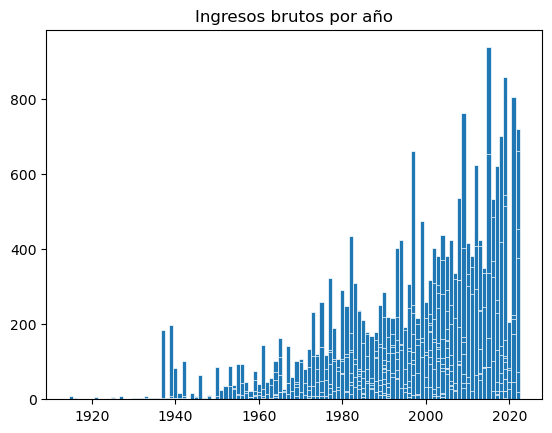

<Figure size 1800x600 with 0 Axes>

In [76]:
fig, ax = plt.subplots()
ax.bar(X['YearOfRelease'], y, width=1, edgecolor="white", linewidth=0.5)
plt.title('Ingresos brutos por año')
plt.figure(figsize=(18,6))
plt.show()

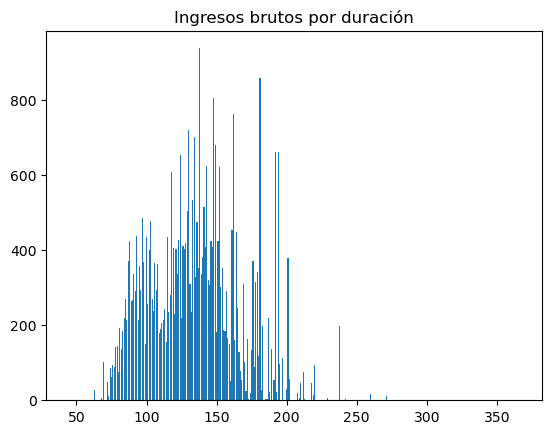

<Figure size 1600x1600 with 0 Axes>

In [77]:
fig, ax = plt.subplots()
ax.bar(X['RunTime'], y)
plt.title('Ingresos brutos por duración')
plt.figure(figsize=(16,16))
plt.show()

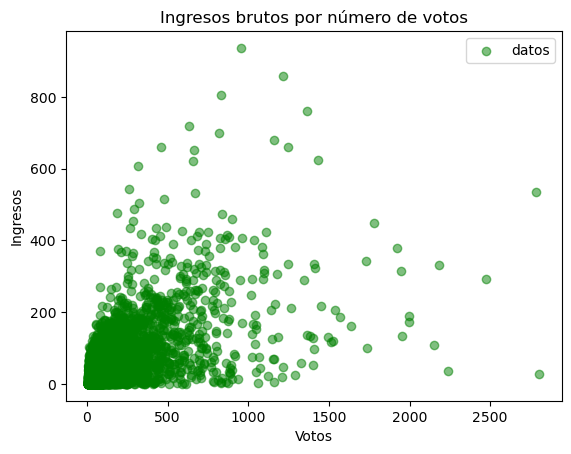

In [79]:
fig, ax = plt.subplots()
ax.scatter(X['Votes'], y, label="datos", color="green", marker="o", alpha=0.5)
plt.title('Ingresos brutos por número de votos')
plt.xlabel("Votos")
plt.ylabel("Ingresos")
plt.legend()
plt.show()

# Imputación de datos